The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/Maxi/.virtualenvs/svm_venv/lib/python3.7/site-packages/sympy/core/expr.py:3951: SymPyDeprecationWarning: 

expr_free_symbols method has been deprecated since SymPy 1.9. See
https://github.com/sympy/sympy/issues/21494 for more info.

  deprecated_since_version="1.9").warn()


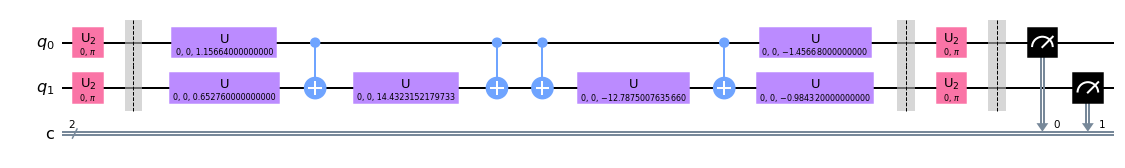

In [71]:
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit.circuit.library import ZZFeatureMap, PauliFeatureMap
from qiskit import BasicAer, Aer, execute
from qiskit.utils import QuantumInstance
import numpy as np
%load_ext autoreload

%autoreload 2

zz_map = ZZFeatureMap(feature_dimension=2, reps=1, entanglement='linear', insert_barriers=True)

zz_kernel = QuantumKernel(feature_map=zz_map, quantum_instance=Aer.get_backend('statevector_simulator'))

zz_circuit = zz_kernel.construct_circuit(np.array([0.57832, 0.32638]), np.array([0.72834, 0.49216]))
zz_circuit.decompose().decompose().decompose().draw(output='mpl')

In [72]:
print(zz_map)

     ┌───┐ ░ ┌──────────────┐                                           
q_0: ┤ H ├─░─┤ U1(2.0*x[0]) ├──■─────────────────────────────────────■──
     ├───┤ ░ ├──────────────┤┌─┴─┐┌───────────────────────────────┐┌─┴─┐
q_1: ┤ H ├─░─┤ U1(2.0*x[1]) ├┤ X ├┤ U1(2.0*(π - x[0])*(π - x[1])) ├┤ X ├
     └───┘ ░ └──────────────┘└───┘└───────────────────────────────┘└───┘


In [78]:
from quantum_svm.quantum.feature_maps import ZZFeatureMap as ZZMap_custom
from quantum_svm.quantum.utils import data_map_func

In [85]:
X = np.random.rand(80,2)
X

array([[0.48182407, 0.57820982],
       [0.92492468, 0.65250287],
       [0.8838522 , 0.95963257],
       [0.95895044, 0.49389856],
       [0.41969147, 0.2375039 ],
       [0.2582456 , 0.40511951],
       [0.44107529, 0.73728362],
       [0.38927053, 0.90024367],
       [0.02330028, 0.71935016],
       [0.28475766, 0.15876317],
       [0.15137424, 0.66435082],
       [0.3375654 , 0.59016662],
       [0.30609301, 0.2047183 ],
       [0.95940164, 0.68739132],
       [0.28730502, 0.01242288],
       [0.5400429 , 0.36375563],
       [0.94967134, 0.95338382],
       [0.12324782, 0.71925172],
       [0.37185047, 0.03924397],
       [0.62119487, 0.16384481],
       [0.51367897, 0.29999807],
       [0.20411629, 0.18339024],
       [0.24484424, 0.05180573],
       [0.13879849, 0.77924103],
       [0.68817732, 0.65842247],
       [0.91368227, 0.60099664],
       [0.40374865, 0.810341  ],
       [0.7280731 , 0.68038153],
       [0.58659488, 0.94782319],
       [0.38464558, 0.7685895 ],
       [0.

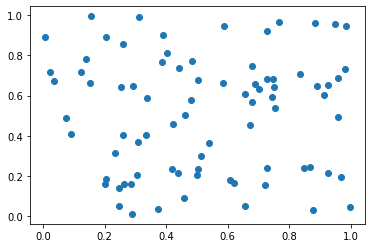

In [93]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1])

In [103]:
from quantum_svm.quantum.kernels import QuantumKernel as QK_custom
quantum_params = {
    'feature_dimension': 2,
    'reps': 2,
    'seed': 1024,
    'shots': 2**14,   
    'provider_backend': None,
}

zz_map_test = ZZMap_custom(quantum_params['feature_dimension'], quantum_params['reps'], insert_barriers=True)

In [104]:
print(zz_map_test)

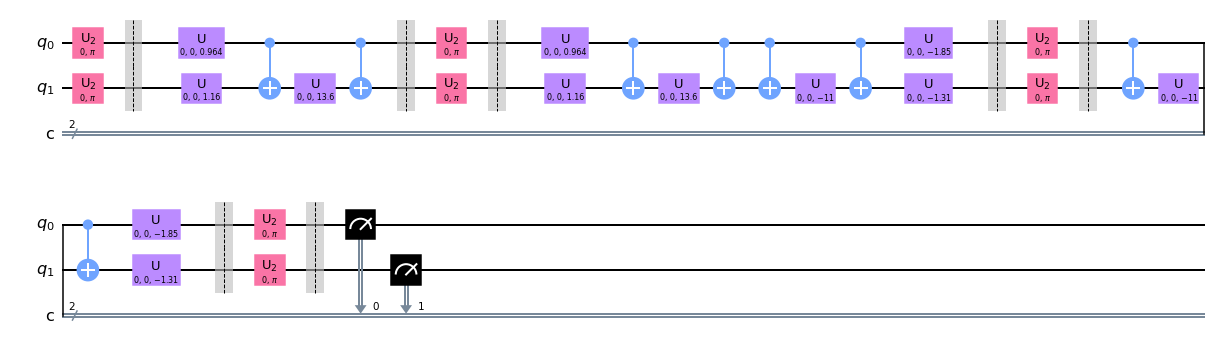

In [105]:
backend = Aer.get_backend('qasm_simulator')
zz_kernel = QK_custom(feature_map=zz_map_test, quantum_backend=backend, sim_params=quantum_params)
circuits = []
for i in range(X.shape[0]):
    for j in range(X.shape[0]):
        circuits.append(zz_kernel.construct_circuit(X[i], X[j]))
        
circuits[1].decompose().decompose().draw('mpl')

In [106]:
QK_custom = zz_kernel.evaluate(X)
QK_custom

array([[1.        , 0.93255615, 0.85809326, ..., 0.27008057, 0.87768555,
        0.42590332],
       [0.9274292 , 1.        , 0.90179443, ..., 0.13024902, 0.88049316,
        0.48718262],
       [0.8571167 , 0.90258789, 1.        , ..., 0.16558838, 0.77386475,
        0.54370117],
       ...,
       [0.27532959, 0.12969971, 0.16052246, ..., 1.        , 0.081604  ,
        0.12121582],
       [0.87982178, 0.87896729, 0.77557373, ..., 0.08660889, 1.        ,
        0.70257568],
       [0.42828369, 0.49145508, 0.54730225, ..., 0.11468506, 0.70196533,
        1.        ]])

In [107]:
from quantum_svm.quantum.quantum_kernels import quantum_kernel

QK = quantum_kernel(quantum_params)

QK_X = QK(X)
QK_X

array([[1.00979171, 0.93041821, 0.86032755, ..., 0.27227738, 0.87439221,
        0.42585636],
       [0.93041821, 1.00857653, 0.90229823, ..., 0.13596251, 0.88326681,
        0.48744527],
       [0.86032755, 0.90229823, 1.00841834, ..., 0.15682961, 0.77642682,
        0.54238065],
       ...,
       [0.27227738, 0.13596251, 0.15682961, ..., 1.00413746, 0.08237879,
        0.11790985],
       [0.87439221, 0.88326681, 0.77642682, ..., 0.08237879, 1.0076065 ,
        0.69506052],
       [0.42585636, 0.48744527, 0.54238065, ..., 0.11790985, 0.69506052,
        1.00658056]])

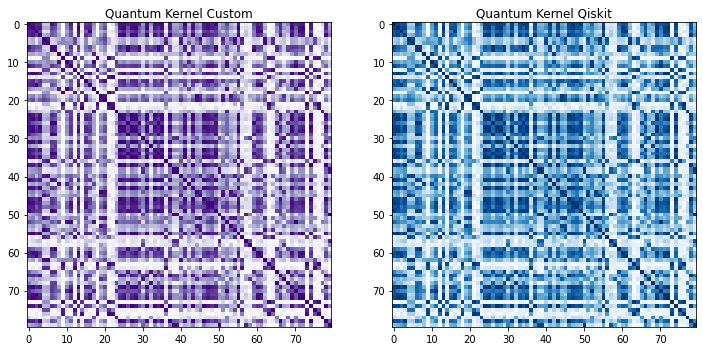

In [108]:
fig, ax = plt.subplots(1, 2, figsize=(12, 10))
ax[0].imshow(np.asmatrix(QK_custom),
              interpolation='nearest', origin='upper', cmap='Purples')
ax[0].set_title("Quantum Kernel Custom")
ax[1].imshow(np.asmatrix(QK_X),
              interpolation='nearest', origin='upper', cmap='Blues')
ax[1].set_title("Quantum Kernel Qiskit")
plt.show()

In [42]:
from qiskit.utils import QuantumInstance
shots = 8192
seed = 1024
q_instance = QuantumInstance(Aer.get_backend('statevector_simulator'), shots=shots,
                                    seed_simulator=seed, seed_transpiler=seed)

In [43]:
res = execute(circuits[1], backend=Aer.get_backend('statevector_simulator'), shots=shots,
                                                  seed_simulator=seed, seed_transpiler=seed)


In [44]:
st_vec = []
for i in range(1):
    st_vec.append(res.result().get_statevector(i))

In [45]:
st_vec

[array([ 0.        +0.j        ,  0.        +0.j        ,
        -0.        +0.j        ,  0.41709801-0.90886151j])]

In [46]:
res = execute(circuits[2], backend=Aer.get_backend('qasm_simulator'), shots=shots,
                                                  seed_simulator=seed, seed_transpiler=seed)
res_2 = res.result().get_counts()
res_2

{'01': 122, '00': 123, '10': 1937, '11': 6010}

In [47]:
m_bias = "0"*2
res_2.get(m_bias, 0) / sum(res_2.values())

0.0150146484375

In [49]:
res = execute(circuits, backend=Aer.get_backend('qasm_simulator'), shots=shots,
                                                  seed_simulator=seed, seed_transpiler=seed)
k_values = []
m_bias = "0"*2

for i in range(len(circuits)):
    res_2 = res.result().get_counts(i)
    k_values.append(res_2.get(m_bias, 0) / sum(res_2.values()))

    

In [50]:
k_values

[1.0,
 0.6673583984375,
 0.0152587890625,
 0.666748046875,
 1.0,
 0.091552734375,
 0.012451171875,
 0.0926513671875,
 1.0]

In [51]:
np.array(k_values).reshape(3,3)

array([[1.        , 0.6673584 , 0.01525879],
       [0.66674805, 1.        , 0.09155273],
       [0.01245117, 0.09265137, 1.        ]])

In [86]:
#rows = []
#start = 0    
#end = 10
#for i in range(2):
#    rows.append(st_vec[start:end])
#    start = end
#    end += 2

In [87]:
#K_st_vec = np.array(rows)
#K_st_vec.shape

In [88]:
qk = np.zeros((K_st_vec.shape[0], K_st_vec.shape[1]))
print(qk.shape)
for i in range(K_st_vec.shape[0]):
    for j in range(K_st_vec.shape[1]):
#        qk[i,j] =
        a = np.vdot(K_st_vec[i][j], K_st_vec[i][j])
        qk[i, j] = np.vdot(a, a).real

(2, 2)


In [89]:
qk

array([[1., 1.],
       [1., 1.]])

In [128]:
from quantum_svm.quantum.quantum_kernels import quantum_kernel
quantum_params = {
    'feature_dimension': 2,
    'reps': 1,
    'seed': 1024,
    'shots': 8192,   
    'provider_backend': None,
}

QK = quantum_kernel(quantum_params)

QK_X = QK(X)
QK_X

array([[1.        , 0.00366211, 0.12780762],
       [0.00366211, 1.        , 0.78198242],
       [0.12780762, 0.78198242, 1.        ]])

In [ ]:
zz_map.n_qubits

In [ ]:
from qiskit.circuit import Gate

In [ ]:
import qiskit as qk
from qiskit import BasicAer, Aer, execute
# Creating Qubits
q = qk.QuantumRegister(2)
# Creating Classical Bits
c = qk.ClassicalRegister(2)
circuit = qk.QuantumCircuit(q, c)
circuit.append(inst.reverse_ops(), [0,1])
circuit.decompose().draw('mpl')

In [ ]:
from quantum_svm.quantum.kernels import QuantumKernel as QK_custom 

zz_map_test = ZZMap_custom(2, 2, insert_barriers=True)
data = [np.array([0.57832, 0.32638]), np.array([0.72834, 0.49216])]
#data = np.array([0.57832, 0.32638])
#zz_kernel = QK_custom(feature_map=zz_map_test, qunatum_instance=)

#circuit = zz_kernel.construct_circuit()
#circuit.decompose().decompose().draw('mpl')

In [ ]:
##### continue - very close

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1])

In [ ]:
from quantum_svm.quantum.kernels import QuantumKernel as QK_custom 
quantum_params = {
    'feature_dimension': 2,
    'reps': 2,
    'seed': 1024,
    'shots': 8192,   
    'provider_backend': None,
}
backend = Aer.get_backend('statevector_simulator')
zz_kernel = QK_custom(feature_map=zz_map_test, quantum_backend=backend, sim_params=quantum_params)
circuits = []
for i in range(X.shape[0]):
    for j in range(X.shape[0]):
        circuits.append(zz_kernel.construct_circuit(X[i], X[j]))
        
circuits[10].decompose().decompose().draw('mpl')

In [ ]:
statevectors = []
#results = self._quantum_instance.execute(circuits, had_transpiled=True)
#for j in range(N*N):
#    statevectors.append(results.get_statevector(j))
job = execute(circuits, backend, shots=quantum_params['shots'], seed_simulator=quantum_params['seed'], see_transpiler=quantum_params['seed'])


In [ ]:
for j in range(10*10):
    statevectors.append(job.result().get_statevector(j))

In [ ]:
statevectors

In [ ]:
st_vec = zz_kernel.evaluate(X)

In [ ]:
st_vec

In [ ]:
rows = []
start = 0    
end = 10
for i in range(10):
    rows.append(st_vec[start:end])
    start = end
    end += 10
    

In [ ]:
K_st_vec = np.array(rows)
K_st_vec.shape

In [ ]:
K_st_vec.shape[0]

In [ ]:
qk = np.zeros((K_st_vec.shape[0], K_st_vec.shape[1]))
print(qk.shape)
for i in range(K_st_vec.shape[0]):
    for j in range(K_st_vec.shape[1]):
#        qk[i,j] =
        a = np.vdot(K_st_vec[i][j], K_st_vec[i][j])
        qk[i, j] = np.vdot(a, a).real

In [ ]:
qk 

In [ ]:
from quantum_svm.quantum.quantum_kernels import quantum_kernel

In [ ]:
QK = quantum_kernel(quantum_params)

In [ ]:
QK_X = QK(X)

In [ ]:
QK_X

In [ ]:
img = np.vdot(st_vec[2],st_vec[2])
real = np.vdot(img, img).real
real

In [ ]:
img = np.vdot(st_vec[0],st_vec[1]).real
img

In [ ]:
str(backend)  == 'statevector_simulator'

In [ ]:
#from qiskit.providers.aer.backends.aerbackend.AerBackend import StatevectorSimulator

if isinstance(backend, Aer.get_backend('statevector_simulator')):
    print(True)

In [ ]:
st_vec
N = X.shape[0]
kernel = np.array((N, N))
ind = N*N
for i in range(N):
    j = 10
    c = i+1
    kernel[i,:] = st_vec[:j*c]

In [ ]:
arr = np.array(st_vec)
arr

In [ ]:
# simulate 
backend = Aer.get_backend('statevector_simulator')
job = execute(circuits, backend, shots=8192, seed_simulator=1024, see_transpiler=1024, had_transpiled=True)
statevectors = []
for j in range(2):
    statevectors.append(job.result().get_statevector(j))

In [ ]:
statevectors

In [ ]:
statevectors

In [ ]:
# at state vetcors 

In [ ]:
##### continue - very close

In [ ]:
counts

In [ ]:
import qiskit as qk
from qiskit import BasicAer, Aer, execute
# Creating Qubits
q = qk.QuantumRegister(2)
# Creating Classical Bits
c = qk.ClassicalRegister(2)

In [ ]:
circuit = qk.QuantumCircuit(q, c)
# Hadamard Gate on the first Qubit
circuit.h(q[0])
# CNOT Gate on the first and second Qubits
circuit.cx(q[0], q[1])
# Measuring the Qubits
circuit.measure(q, c)
circuit.draw('mpl')

In [ ]:
from qiskit.utils import QuantumInstance
shots = 8192
seed = 1024
q_instance = QuantumInstance(Aer.get_backend('statevector_simulator'), shots=shots,
                                    seed_simulator=seed, seed_transpiler=seed)

In [ ]:
res = q_instance.execute(circuits[1], had_transpiled=True)

In [ ]:
res.get_statevector()

In [ ]:
backend = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend, shots=8192, seed_simulator=1024, see_transpiler=1024)
counts= job.result().get_counts(circuit)

In [ ]:
counts

In [ ]:
from qiskit.circuit.gate import Gate

In [ ]:
circuit = qk.QuantumCircuit(2)
circuit.h(0)
circuit.h(1)
circuit.barrier()
circuit.draw('mpl')

In [ ]:
test = circuit.reverse_ops()
test.draw('mpl')

In [ ]:
circuit = qk.QuantumCircuit(2)
circuit.h(0)
circuit.h(1)
circuit.barrier()
circuit.u(0,0,2*custom_data_map_func(np.array([0.57832])),0)
circuit.u(0,0,2*custom_data_map_func(np.array([0.32638])),1)
circuit.cx(0,1)
circuit.u(0,0,2*custom_data_map_func(np.array([0.57832, 0.32638])),1)
circuit.cx(0,1)
circuit.draw('mpl')

In [ ]:
from qiskit.circuit.quantumcircuit import QuantumCircuit
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.h(1)
circuit.barrier()
circuit.u(0,0,2*custom_data_map_func(np.array([0.57832])),0)
circuit.u(0,0,2*custom_data_map_func(np.array([0.32638])),1)
circuit.cx(0,1)
circuit.u(0,0,2*custom_data_map_func(np.array([0.57832, 0.32638])),1)
circuit.cx(0,1)
circuit.draw('mpl')

In [ ]:
inverse = circuit.mirror()
inverse.draw('mpl')

In [ ]:
hasattr(circuit, 'mirror')

In [ ]:
new_qc = circuit.compose(inverse, [0,1])
new_qc.draw('mpl')

In [ ]:
import functools

def custom_data_map_func(x):
    """Define a function map from R^n to R.
    
    Args:
        x (np.ndarray): data
    Returns:
        double: the mapped value
    """
    coeff = x[0] if len(x) == 1 else functools.reduce(lambda m, n: m * n, np.pi - x)
    return coeff

In [ ]:
2*custom_data_map_func(np.array([0.57832, 0.32638])), 2*custom_data_map_func(np.array([0.72834, 0.49216])) 

In [ ]:
2*0.57832

In [ ]:
2*0.32638

In [ ]:
print(circuit)

In [ ]:
print(zz_map)

In [ ]:
zz_map.decompose().decompose().draw('mpl')

In [ ]:
from quantum_svm.quantum.qubit import Qubit
from quantum_svm.quantum.circuit import QuantumCircuit
from quantum_svm.quantum.quantum_gates import Hadamard, PauliX, PauliY, PauliZ, CNOT
import numpy as np

In [ ]:
q0 = Qubit(bit='00')
q0

In [ ]:
circuit = QuantumCircuit([Hadamard(0, 1), CNOT([0, 1], 1, 2)], 2)

bell_circuit.apply(qubit00.get_statevector())

In [ ]:
from qiskit_machine_learning.circuit.library import RawFeatureVector

In [ ]:
feature_map = RawFeatureVector(feature_dimension=2)
feature_map.draw()

In [ ]:
from qiskit_machine_learning.circuit.library import RawFeatureVector

circuit = RawFeatureVector(2)
print(circuit.num_qubits)
# prints: 2
print(circuit.draw(output='text'))

In [ ]:

#print(circuit.ordered_parameters)
# prints: [Parameter(p[0]), Parameter(p[1]), Parameter(p[2]), Parameter(p[3])]
import numpy as np
state = np.array([1, 0]) / np.sqrt(2)

bound = circuit.assign_parameters(state)
print(bound.draw())

In [ ]:
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit.circuit.library import ZZFeatureMap, PauliFeatureMap
from qiskit import BasicAer, Aer, execute
from qiskit.utils import QuantumInstance

In [ ]:
zz_map = ZZFeatureMap(feature_dimension=2, reps=1, entanglement='linear', insert_barriers=True)

In [ ]:
zz_kernel = QuantumKernel(feature_map=zz_map, quantum_instance=Aer.get_backend('statevector_simulator'))

In [ ]:
zz_circuit = zz_kernel.construct_circuit(np.array([0.57832, 0.32638]), np.array([0.72834, 0.49216]))
zz_circuit.decompose().decompose().decompose().draw(output='mpl')

In [ ]:
prep = PauliFeatureMap(2, reps=1, paulis=['ZZ'])
print(prep)

In [ ]:
from quantum_svm.quantum.qubit import Qubit

qubit0 = Qubit(bit='0')
qubit0

qubit0.get_statevector()

qubit00 = Qubit(bit='11')
qubit00

In [ ]:
from quantum_svm.quantum.qubit import Qubit
from quantum_svm.quantum.circuit import QuantumCircuit
from quantum_svm.quantum.quantum_gates import Hadamard, PauliX, PauliY, PauliZ, CNOT
import numpy as np

In [ ]:
qubit00 = Qubit(bit='00')
qubit00

In [ ]:
bell_circuit = QuantumCircuit([
                               Hadamard(0, 2),
                               CNOT([0, 1], 1, 2)
                               ], 
                             2)

bell_00 = bell_circuit.apply(qubit00.get_statevector())
bell_00

In [ ]:
# Measurement 

In [ ]:
qubit0 = Qubit(bit='0')
qubit1 = Qubit(bit='1')
P0 = np.dot(qubit0.get_statevector().T, qubit0.get_statevector())
P1 = np.dot(qubit1.get_statevector().T, qubit1.get_statevector())
P0, P1

In [ ]:
qubit11 = Qubit(bit='11')
bell_11 = bell_circuit.apply(qubit11.get_statevector())
bell_11

In [ ]:
state = 

In [ ]:
qubit0 = Qubit(bit='0')
qubit1 = Qubit(bit='1')

state_zero = qubit0.get_statevector().T
state_one = qubit1.get_statevector().T
state_zero, state_one

In [ ]:
def multi_kron(*args):
    ret = np.array([[1.0]])
    for q in args:
        ret = np.kron(ret, q)
    return ret

gate_H = 1.0 / 2**0.5 * np.array([[1, 1],
                             [1, -1]])

In [ ]:
gate_I = np.eye(2)
state_t0 = multi_kron(state_zero, state_one)
print(state_t0)
state_t1 = np.dot(multi_kron(gate_H, gate_I), state_t0)
print(state_t1)

In [ ]:
# Prepare state
state = np.dot(multi_kron(gate_H, gate_H), multi_kron(state_zero, state_zero))
# Projectors
P0 = np.dot(state_zero, state_zero.T)
P1 = np.dot(state_one, state_one.T)


In [ ]:
# Probability of first qubit being in state 0
rho = np.dot(state, state.T)
prob0 = np.trace(np.dot(multi_kron(P0, gate_I), rho))
# Simulate
if np.random.rand() < prob0:
    ret = 0
    state_ret = np.dot(multi_kron(P0, gate_I), state)
else:
    ret = 1
    state_ret = np.dot(multi_kron(P1, gate_I), state) 
# Normalize
from scipy import linalg
state_ret /= linalg.norm(state_ret)

print("Qubit Measured: \n {} \n After-Measurment State: \n {}".format(ret, state_ret))

In [ ]:

# Wire 0 is right-most wire
cnot = CNOT(wires=[0, 2], target=0, n=3)
x = PauliX(wire=2, n=3)

cnot._build_naive_op_mat()
x._build_naive_op_mat()

v = np.array([1, 2, 3, 4, 5, 6, 7, 8])

cnot_v = cnot.apply(v)
cnot_v_naive = cnot.naive_apply(v)

x_v = x.apply(v)
x_v_naive = x.naive_apply(v)

print(f"v: {v}")
print(f"cnot_v: {cnot_v}")
print(f"cnot_v_naive: {cnot_v_naive.real}")
print(f"x_v: {x_v}")
print(f"x_v_naive: {x_v_naive.real}")

bell_circuit = Circuit([
    Hadamard(0, 2),
    CNOT([0, 1], 1, 2)
], 2)
v = np.array([1, 0, 0, 0])
bell_00 = bell_circuit.apply(v)
print(f"bell_00: {bell_00}")

In [ ]:
from quantum_svm.quantum.qubit import Qubit

In [ ]:
qubit0 = Qubit(bit='0')
qubit0

In [ ]:
qubit0.get_statevector()

In [ ]:
qubit00 = Qubit(bit='11')
qubit00